In [1]:
import pandas as pd
import glob as glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

def flip(p):
    return p > np.random.rand() 

REWARD = 1
COST = .005
N_samples = 10000

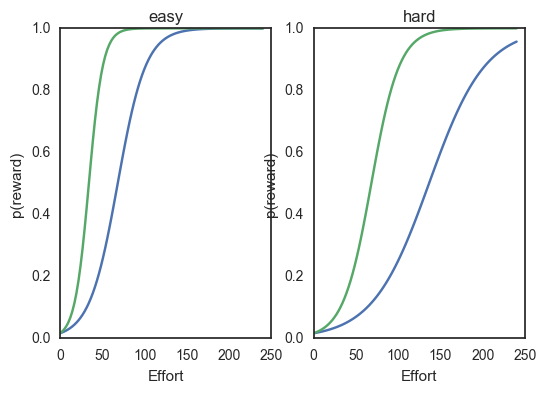

In [2]:

def prob_reward(e,diff,skill): #model for success
    #f = (e * skill) / diff #skill and effort are not independent
    b=.06 #controls slope - was .5
    a=60 #was 30
    c=0
    #a = 1
    #b = 0.05
    #c = 0
    f = (e * skill / diff) 
    
    p = 1/(1+a*np.exp(-f*b)) -c #softmax - scaling the function to be sigmoidal, small errors dont matter as much 
    
    return p

unskilled = 1
skilled = 2
easy = 1
hard = 2
es=np.linspace(0,240,100)
p0 = [prob_reward(e,easy,unskilled) for e in es]
p1 = [prob_reward(e,easy,skilled) for e in es]
plt.subplot(1,2,1)
plt.plot(es,p0, es, p1)
plt.ylim([0,1])
plt.xlabel('Effort') ; plt.ylabel('p(reward)'); plt.title('easy')


p0 = [prob_reward(e,hard,unskilled) for e in es]
p1 = [prob_reward(e,hard,skilled) for e in es]
plt.subplot(1,2,2)
plt.plot(es,p0, es, p1)
plt.ylim([0,1])
plt.xlabel('Effort') ; plt.ylabel('p(reward)'); plt.title('hard')

### Create utility function
 Utility = R x P(R|E,S,D)-cost x E

In [3]:
def get_effort(reward, cost, diff, skill):  #model for planning. Takes in diff, skill, and cost -returns effort
    Us=list()
    es = np.linspace(0, 100, 100) #used to be (0,200,100)
    for i in es:
        U=reward*prob_reward(i, diff, skill)-cost*i #utility function
        Us.append(U)
    return es[np.argmax(Us)], Us, es  #return argmax of utility, and utilities 
            

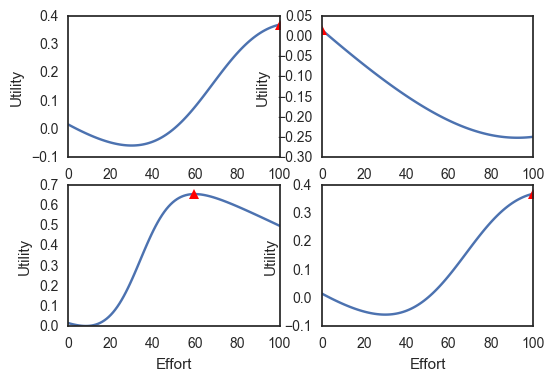

In [4]:

plt.subplot(2,2,1)
effort,Us,es=get_effort(REWARD,COST,hard,skilled) 
plt.plot(es,Us)
plt.plot(effort,max(Us),'r^')
plt.xlabel('Effort')
plt.ylabel('Utility')

plt.subplot(2,2,2)
effort,Us,es=get_effort(REWARD,COST,hard,unskilled) 
plt.plot(es,Us)
plt.plot(effort,max(Us),'r^')
plt.xlabel('Effort')
plt.ylabel('Utility')

plt.subplot(2,2,3)
effort,Us,es=get_effort(REWARD,COST,easy,skilled) 
plt.plot(es,Us)
plt.plot(effort,max(Us),'r^')
plt.xlabel('Effort')
plt.ylabel('Utility')

plt.subplot(2,2,4)
effort,Us,es=get_effort(REWARD,COST,easy,unskilled) 
plt.plot(es,Us)
plt.plot(effort,max(Us),'r^')
plt.xlabel('Effort')
plt.ylabel('Utility')
#plt.savefig('/Users/julialeonard/Desktop/Fall 2015/CoCoSci/final project/imgs/lowD_lowS.pdf')


In [5]:
threshold = 70
#MAKE INTO DIC
sampled_skill_high = list()
sampled_diff_high = list()
sampled_skill_low = list()
sampled_diff_low = list()
sampled_skill_low_fail=list()
sampled_diff_low_fail=list()
sampled_skill_high_fail=list()
sampled_diff_high_fail=list()
diff_samp=list()
skill_samp=list()
effort_samp=list()
succes_samp=list()
for _ in xrange(N_samples):
    skill = np.random.beta(5,2)*100 #skill is a beta function
    diff = np.random.beta(.3,.3)*100 #difficulty is a beta function
    effort,_,_ = get_effort(REWARD, COST, diff, skill)

    high_effort = effort>threshold
    low_effort = effort<threshold

    success = flip(prob_reward(effort,diff,skill))
    fail = 1 - success
    
    diff_samp.append(diff)
    skill_samp.append(skill)
    effort_samp.append(effort)
    succes_samp.append(success)
    if success and high_effort: 
        sampled_skill_high.append(skill)
        sampled_diff_high.append(diff)
    elif success and low_effort: 
        sampled_skill_low.append(skill)
        sampled_diff_low.append(diff)
    elif fail and low_effort: 
        sampled_skill_low_fail.append(skill)
        sampled_diff_low_fail.append(diff)
    elif fail and high_effort: 
        sampled_skill_high_fail.append(skill)
        sampled_diff_high_fail.append(diff)
        

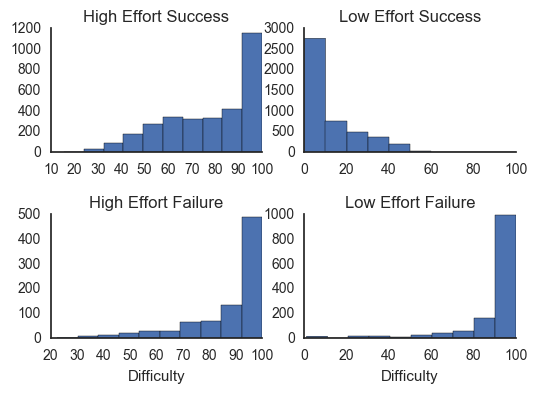

In [10]:
fig = plt.figure()
fig.subplots_adjust(hspace=.5)
plt.subplot(2,2,1)
plt.hist(sampled_diff_high)
plt.title('High Effort Success')
plt.subplot(2,2,2)
plt.hist(sampled_diff_low)
plt.title('Low Effort Success')
plt.subplot(2,2,3)
plt.hist(sampled_diff_high_fail)
plt.title('High Effort Failure')
plt.xlabel('Difficulty')
plt.subplot(2,2,4)
plt.hist(sampled_diff_low_fail)
plt.title('Low Effort Failure')
plt.xlabel('Difficulty')
sns.despine()
plt.savefig('/Users/Jlnrd/Desktop/hists.pdf')

# sampled_skill=sampled_skill_high
# sampled_diff=sampled_diff_high
# # plt.figure(figsize=(4, 3))
# sns.jointplot(
#     np.array(sampled_skill), np.array(sampled_diff),
#     kind="scatter",stat_func=None).set_axis_labels("Skill", "Difficulty")
# plt.ylim([0,100])
# plt.xlim([0,100])
# sns.set_context('paper',font_scale=2)
#plt.savefig('/Users/julialeonard/Desktop/highE_succ.pdf')

In [252]:
def get_your_effort(reward, cost, diff):  #model for planning. Takes in diff, skill, and cost -returns effort
    sampled_effort= list()
    sampled_skill=list()
    for i in xrange(N_samples):
        s = np.random.beta(3,5)*100
        d = np.random.choice(diff)
        effort,_,_=get_effort(reward, cost, d, s)
        sampled_effort.append(effort)
        sampled_skill.append(s)
    
    return sampled_effort, sampled_skill

In [238]:
diff = np.random.beta(.3,.3,size=10000)*100
effort_baseline,skill_baseline = get_your_effort(REWARD,COST,diff)



(0, 100)

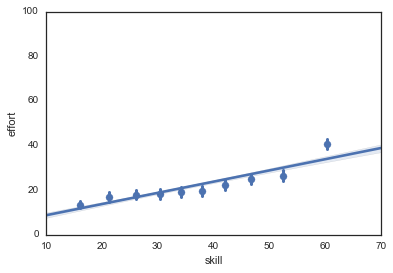

In [239]:
plt.figure()
sns.regplot(np.array(skill_baseline), np.array(effort_baseline), x_bins=10)
plt.xlabel('skill')
plt.ylabel('effort')
plt.ylim([0,100])

In [240]:

diff =  sampled_diff_high
effort_high_success,skill_high_success = get_your_effort(REWARD,COST,diff) #used to be c=.1
diff =  sampled_diff_low
effort_low_success,skill_low_success = get_your_effort(REWARD,COST,diff) #used to be c=.1
diff =  sampled_diff_high_fail
effort_high_fail,skill_high_fail = get_your_effort(REWARD,COST,diff) #used to be c=.1
diff =  sampled_diff_low_fail
effort_low_fail,skill_low_fail = get_your_effort(REWARD,COST,diff) #used to be c=.1



In [241]:
# sns.regplot(np.array(skill_high_success), np.array(effort_high_success), x_bins=10)
# plt.xlabel('skill')
# plt.ylabel('effort')
# plt.ylim([0,100])

# #plt.savefig('/Users/julialeonard/Desktop/Fall 2015/CoCoSci/final project/imgs/highE_success.pdf')
# #plt.figure()
# sns.regplot(np.array(skill_low_success), np.array(effort_low_success), x_bins=10)
# plt.xlabel('skill')
# plt.ylabel('effort')
# plt.ylim([0,100])
# #plt.savefig('/Users/julialeonard/Desktop/Fall 2015/CoCoSci/final project/imgs/LowE_highE_success.pdf')
# plt.figure()
# sns.regplot(np.array(skill_high_fail), np.array(effort_high_fail), x_bins=10)
# plt.xlabel('skill')
# plt.ylabel('effort')
# plt.ylim([0,100])
# #plt.savefig('/Users/julialeonard/Desktop/Fall 2015/CoCoSci/final project/imgs/HighE_fail.pdf')
# plt.figure()
# sns.regplot(np.array(skill_low_fail), np.array(effort_low_fail), x_bins=10)
# plt.xlabel('skill')
# plt.ylabel('effort')
# plt.ylim([0,100])
# #plt.savefig('/Users/julialeonard/Desktop/Fall 2015/CoCoSci/final project/imgs/LowE_fail.pdf')

# plt.show()

(10, 70)

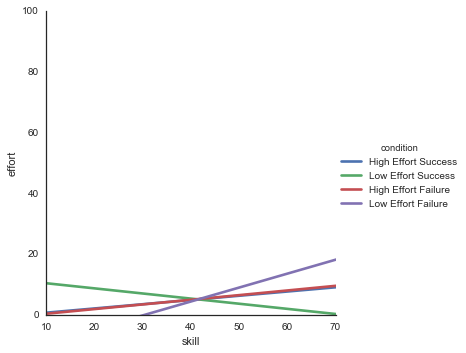

In [242]:
df = []
for s, e in zip(skill_high_success, effort_high_success):
    df.append({
            'skill':s,
            'effort':e,
            'condition':'High Effort Success'
        })

for s, e in zip(skill_low_success, effort_low_success):
    df.append({
            'skill':s,
            'effort':e,
            'condition':'Low Effort Success'
        })
    
for s, e in zip(skill_high_fail, effort_high_fail):
    df.append({
            'skill':s,
            'effort':e,
            'condition':'High Effort Failure'
        })
    
for s, e in zip(skill_low_fail, effort_low_fail):
    df.append({
            'skill':s,
            'effort':e,
            'condition':'Low Effort Failure'
        })
    
df = pd.DataFrame(df)

sns.lmplot(x="skill", y="effort", hue="condition", data=df, scatter=False, ci=None)
plt.ylim([0,100])
plt.xlim([10,70])

In [243]:
def your_eff_know_skill(reward, cost, diff,skill):  #model for planning. Takes in diff, skill, and cost -returns effort
    sampled_effort= list()
    sampled_skill=list()
    for i in xrange(N_samples):
        d = np.random.choice(diff)
        effort,_,_=get_effort(reward, cost, d, skill)
        sampled_effort.append(effort)
        sampled_skill.append(skill)
    
    return sampled_effort

In [244]:
skill=45
your_eff_know_skill(REWARD, COST, diff,skill)
diff =  sampled_diff_high
effort_high_success = your_eff_know_skill(REWARD, COST, diff,skill) #used to be c=.1
diff =  sampled_diff_low
effort_low_success = your_eff_know_skill(REWARD, COST, diff,skill) #used to be c=.1
diff =  sampled_diff_high_fail
effort_high_fail = your_eff_know_skill(REWARD, COST, diff,skill) #used to be c=.1
diff =  sampled_diff_low_fail
effort_low_fail = your_eff_know_skill(REWARD, COST, diff,skill) #used to be c=.1


print np.mean(effort_high_success)
print np.mean(effort_low_success)
print np.mean(effort_high_fail)
print np.mean(effort_low_fail)


2.04121212121
3.97616161616
2.00565656566
0.000808080808081


In [245]:
scale = 2.5
print np.mean(effort_high_success)*scale
print np.mean(effort_low_success)*scale
print np.mean(effort_high_fail)*scale
print np.mean(effort_low_fail)*scale

high_effort_fail=30
high_effort_success=107
low_effort_fail=35
low_effort_success=57

d = {'Model' : pd.Series([np.mean(effort_high_success)*scale, np.mean(effort_low_success)*scale, np.mean(effort_high_fail)*scale, np.mean(effort_low_fail)*scale], index=['High Effort Success', 'Low Effort Success', 'High Effort Failure', 'Low Effort Failure']),
     'Human' : pd.Series([107, 57, 30, 35], index=['High Effort Success', 'Low Effort Success', 'High Effort Failure', 'Low Effort Failure'])}

df = pd.DataFrame(d)
df


5.10303030303
9.9404040404
5.01414141414
0.0020202020202


,Human,Model
High Effort Success,107,5.103030
Low Effort Success,57,9.940404
High Effort Failure,30,5.014141
Low Effort Failure,35,0.002020
